## Environment initialization

In [2]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params) 

#append path with python modules
import importlib
import sys

sys.path.append("../modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf)

import quadratic_equation as qef
importlib.reload(qef);

<br/><br/>
<br/><br/>

<h1 align="center">
 Machine learning II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
University of Warsaw <br>
Faculty of Physics <br>    
</h1>

# Dense/fully connected architecture, FCN

Standard neural network architecture is many **sequential** layers

* the hidden layers usually have the ReLu activation function:

```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
```

* the output layers usually have an activation function:
    * **linear** - for regression tasks:
      <br></br>
      
      ```Python
      tf.keras.layers.Dense(nNeurons, activation="linear", name="layer_{}".format(iLayer))(x)
      ```

     <br></br>
    * **softmax** - for classification tasks:
      <br></br>
      ```Python
       tf.keras.layers.Dense(nNeurons, activation="softmax", name="layer_{}".format(iLayer))(x)
      ```
      <br></br>

Functions can be given to the constructor by name or by explicitly naming the function object:
```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
tf.keras.layers.Dense(nNeurons, activation=tf.keras.activations.relu, name="layer_{}".format(iLayer))(x)
```

In a dense architecture an input to a given layer is the output of the previous layer. The exception is of course the input layer.

A dense layer, `tf.keras.layers.Dense` takes many arguments:
```Python
tf.keras.layers.Dense(
    units,                    #number of neurons
    activation=None,          #activation function
    use_bias=True,            #flag controlling the bias / offset term: w*x+b
    kernel_initializer='glorot_uniform',#initial weights probability distribution
    bias_initializer='zeros', #initial bias probability distribution
    kernel_regularizer=None,  #regularizing function for the weights
    bias_regularizer=None,    #regularizing function for the biases
    activity_regularizer=None,#regularizing function for the neuron activation
    kernel_constraint=None,   #constraint function for the weights
    bias_constraint=None,     #constraint function for the biases
    **kwargs
)
```

A neural network comprising
* an input layer taking `nInputs` values
* two hidden layers with `nNeurons` neurons (units)
* an output layer with `nOutputNeurons` neurons

In [7]:
nInputs = 4
nNeurons = 3
nOutputNeurons = 1

inputs = tf.keras.Input(shape=(nInputs,), name="features")

layer1 = tf.keras.layers.Dense(nNeurons, name="layer_1")(inputs)
layer2 = tf.keras.layers.Dense(nNeurons, name="layer_2")(layer1)
            
outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer2)   

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
tf.keras.utils.plot_model(model, 'fig_png/ML_model.png', show_shapes=True)
model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 4)]               0         
                                                                 
 layer_1 (Dense)             (None, 3)                 15        
                                                                 
 layer_2 (Dense)             (None, 3)                 12        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model definition is much more convinient using a loop.

**Please:**

Write the function `getModel()`, 

```Python
getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1)
```

with the following arguments:

* input data shape: `inputShape`
* list containing the numbers of neurons in consecutive layers, including the output layer: `nNeurons = [64,32,16,1]`
* activation function for the hidden and output layers: `hiddenActivation, outputActivation` with proper default values
* number of output neurons: `nOutputNeurons` with a default value of `1`

Next, initialize the `model` variable using the `getModel()` function and print out the model summary using the `summary()` method.

In [8]:
#BEGIN_SOLUTION
def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):

    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  #kernel_initializer=tf.keras.initializers.RandomNormal(),
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  name="layer_"+str(iLayer))(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = getModel((128), [64,32,16,1])
model.summary()
#END_SOLUTION
pass

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 128)]             0         
                                                                 
 layer_0 (Dense)             (None, 64)                8256      
                                                                 
 layer_1 (Dense)             (None, 32)                2080      
                                                                 
 layer_2 (Dense)             (None, 16)                528       
                                                                 
 layer_3 (Dense)             (None, 1)                 17        
                                                                 
 output (Dense)              (None, 1)                 2         
                                                                 
Total params: 10883 (42.51 KB)
Trainable params: 10883 (42.51 K

**Please:**

* build a model with one hidden layer with 1024 neurons and one output 
* set gaussian weight initialization:
  
```Python
tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
  
```
* set random uniform bias initialization in the `[-1,1]` range:
  
```Python
tf.keras.initializers.RandomUniform(minval=-1, maxval=1)

```
* draw a histogram of the weights
* draw a histogram of the biases

**Hint:** please pay attention to the shape of the weights and biases matrices when drawing the histogram

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 1)]               0         
                                                                 
 layer_0 (Dense)             (None, 1024)              2048      
                                                                 
 output (Dense)              (None, 1)                 1025      
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


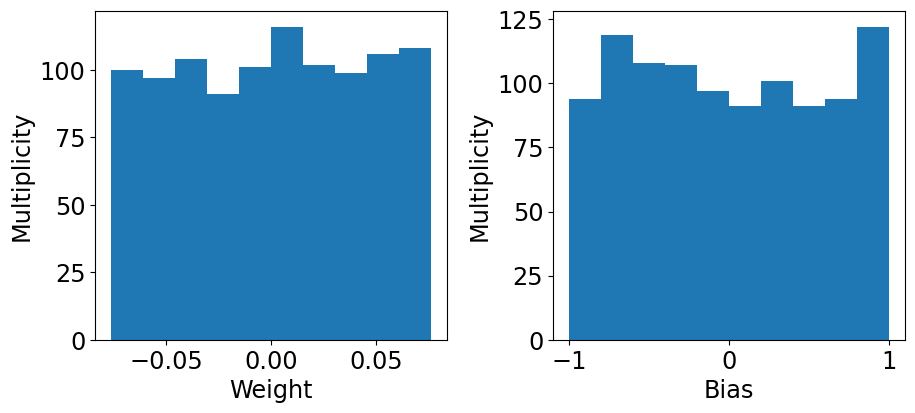

In [9]:
#BEGIN_SOLUTION
model = getModel((1), [1024])
model.summary()

weights = model.get_layer('layer_0').weights[0].numpy()[0,:]
biases = model.get_layer('layer_0').weights[1].numpy()[:]

fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].hist(weights, label="Layer weights");
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Multiplicity')

axes[1].hist(biases, label="Layer biases");
axes[1].set_xlabel('Bias')
axes[1].set_ylabel('Multiplicity')
axes[1].set_xlim([-1.1,1.1])
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

By default, dense layer weights are initialized using an uniform distribution over `[-w, w]` where
$$
\Large{
w = \frac{\sqrt{6}}{nInput + nOutput}
}
$$

```Python
tf.keras.initializers.GlorotUniform(seed=None)
```

Glorot initialization improves learning convergence. In particular it reduces the effects of:
* **vanishing gradient** - at some point during training, the network stops learning despite not fitting the data
* **exploding gradient** - at some point during training, the gradient values become very large 

Some sources suggest `He uniform` for ReLu activations:

$$
\Large{
w = \frac{\sqrt{6}}{nInput}
}
$$

**Please:**

* define a single layer of 1 neuron and 12 input features in the range `[0,1]`
* use the default initialization for the weights and bias
* prepare 10 000 examples of 12 random features from an uniform distribution over `[0,1]`
* plot the distribution of input features
* plot the distribution of the output value
* repeat the plots for an exponential distribution of features

**Question**: why does the value distribution look like that?

Output mean: 0.5884
Output standard deviation: 0.3571


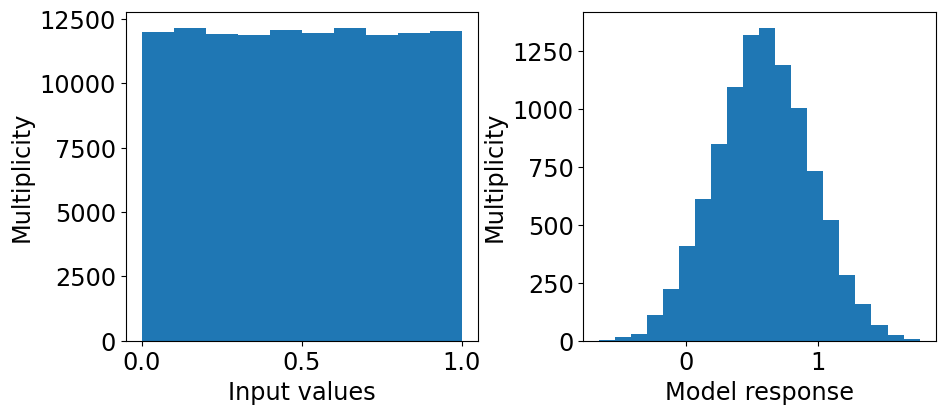

In [10]:
#BEGIN_SOLUTION
model = tf.keras.layers.Dense(1)
x = np.random.default_rng().uniform(0,1, (10000,12))
# x = np.random.default_rng().exponential(1, (10000,12))
y_pred = model(x)

fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].hist(x.flatten());
axes[0].set_xlabel('Input values')
axes[0].set_ylabel('Multiplicity')

axes[1].hist(y_pred[:,0], bins=20);
axes[1].set_xlabel('Model response')
axes[1].set_ylabel('Multiplicity')
#axes[1].set_yscale('log')
print(colored("Output mean:","blue"), "{:3.4f}".format(tf.math.reduce_mean(y_pred)))
print(colored("Output standard deviation:","blue"), "{:3.4f}".format(tf.math.reduce_std(y_pred)))
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

## Reconstructing the step function

**Please:**

* generate 256 $(x,y)$ pairs, where:
    * $x$ - random numbers uniformly distributed over $[0,1]$
    * $y$ are:
    $$
    \huge{
    y = 
    \begin{cases}
      1 & \text{when x>0 and x<0.5} \\
      0 & \text{in other cases}
      \end{cases}
    }
    $$
* split the data into two equally sized sets: training and validation
* define and train a neural network that reconstructs the relationship `y(x)`
* plot the loss function over training and validation sets using the `plotHistory()` function from the `plotting_functions` module
* plot `data` points and the model outputs for training dataset
* plot `data` points and the model outputs for validation dataset
* modifying the network parameters, find a model that achieves precision better than $3\cdot10^{-3}$ on the validation dataset, where the precision is defined as: 
$$
\huge{
\delta = \max{|f(x) - Y|}
}
$$

**Hint:** please experiment with the number of layers and neurons, learning rate, activation funcion etc.


4/4 [==============================] - 0s 315us/step
Delta on training set: 0.0049
4/4 [==============================] - 0s 2ms/step
Delta on validation set: 0.0074
CPU times: total: 2min 39s
Wall time: 2min 11s


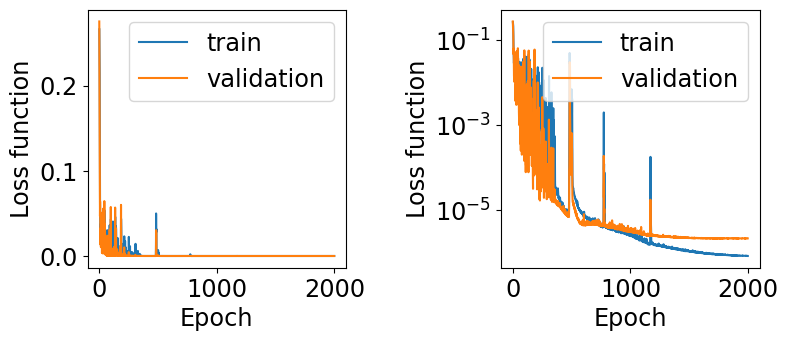

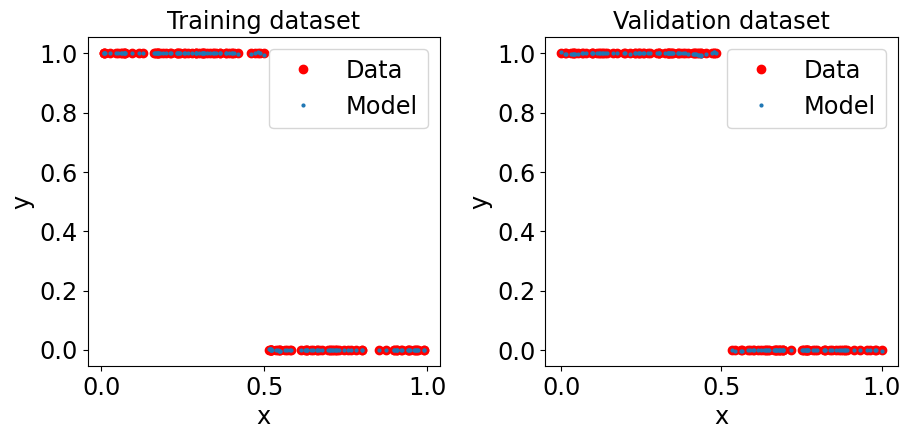

In [11]:
%%time 
#BEGIN_SOLUTION
#data creation
x = np.random.default_rng().uniform(0,1, (256,1))
y = (x>0)*(x<0.5)
y = y.astype(np.float64)
x_train, y_train = x[:128,:], y[:128,:]
x_val, y_val = x[128:,:], y[128:,:]
mask = np.abs(x_val-0.5)>1E-2
x_val = x_val[mask].reshape(-1,1)
y_val = y_val[mask].reshape(-1,1)

#model definition
inputShape = 1
nNeurons = np.full((8), 32)
model = getModel(inputShape, nNeurons)

initial_learning_rate = 1E-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss=tf.keras.losses.MeanSquaredError())
                  
#trainining
nEpochs = 2000
history = model.fit(x=x_train, y=y_train, 
                    epochs=nEpochs, 
                    batch_size = 8,
                    validation_data=(x_val, y_val),
                    verbose=0)
plf.plotTrainHistory(history)

#evaluation on test dataset
y_pred = model.predict(x_train)
delta = np.max(y_train - y_pred)
print(colored("Delta on training set:","blue"), "{:3.4f}".format(delta))

fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].plot(x_train,y_train,"o", color="red", label="Data");
axes[0].plot(x_train,y_pred,"o", markersize=2, label="Model")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title("Training dataset")
axes[0].legend();

#evaluation on validation dataset
y_pred = model.predict(x_val)
delta = np.max(y_val - y_pred)
print(colored("Delta on validation set:","blue"), "{:3.4f}".format(delta))

axes[1].plot(x_val,y_val,"o", color="red", label="Data");
axes[1].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title("Validation dataset")
axes[1].legend();

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

**Please:**

* plot a zoom-in of the data and model results in the region before the step: x$\in$[0.41, 0.51], y$\in$[0.99, 1.01]
* plot a zoom-in of the data and model results in the region after the step: x$\in$[0.49, 0.61], y$\in$[-0.01, 0.01]

63/63 [==============================] - 0s 1ms/step


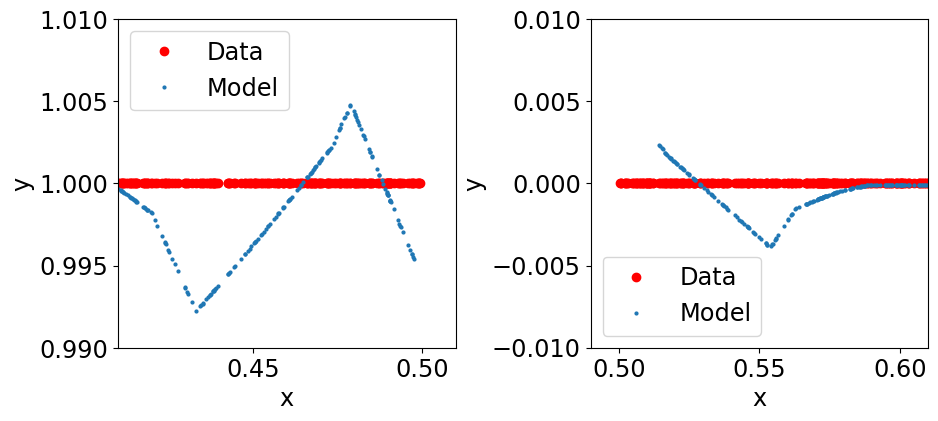

In [12]:
##BEGIN_SOLUTION
fig, axes = plt.subplots(1, 2, figsize=(9,4.5))

x_val = np.random.default_rng().uniform(0,1, (2000,1))
y_val = (x_val>0)*(x_val<0.5)
y_val = y_val.astype(np.float64)
y_pred = model.predict(x_val)

axes[0].plot(x_val,y_val,"o", color="red", label="Data");
axes[0].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_xlim([0.41, 0.51])
axes[0].set_ylim([0.99, 1.01])
axes[0].legend();

axes[1].plot(x_val,y_val,"o", color="red", label="Data");
axes[1].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_xlim([0.49, 0.61])
axes[1].set_ylim([-0.01, 0.01])
axes[1].legend();

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.4)
#END_SOLUTION
pass

**Please:**

* plot the data and model response in the range not covered by the training data: x$\in$[-5,5] 

63/63 [==============================] - 0s 1ms/step


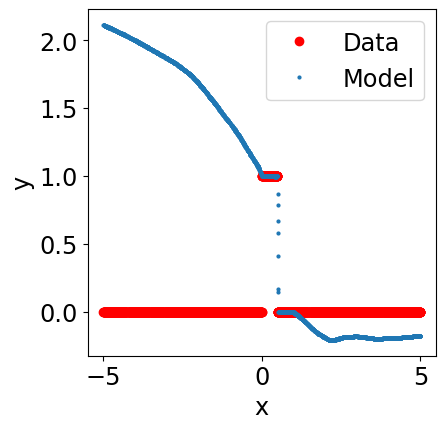

In [13]:
#BEGIN_SOLUTION
x_val = np.random.default_rng().uniform(-5,5, (2000,1))
y_val = (x_val>0)*(x_val<0.5)
y_val = y_val.astype(np.float64)
y_pred = model.predict(x_val)

fig, axes = plt.subplots(1, 1, figsize=(4.5,4.5))
axes.plot(x_val,y_val,"o", color="red", label="Data");
axes.plot(x_val,y_pred,"o", markersize=2, label="Model")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend();
#END_SOLUTION
pass

## Network solving a quadratic equation.

**Please:**

Prepare a dataset for solving a quadratic equation

* x - coefficients in the range [-1,1]$^{3}$
* y - equation 'solvability': `True/False`.
* set the `y` shape as `(-1,1)`
* use 1000 examples for training and 10000 for validation
* print the data shapes 

In [14]:
nSamples = 1000
x_train = qef.quadraticEqGenertor(nSamples)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)

nSamples = 10000
x_val = qef.quadraticEqGenertor(nSamples)
y_val = np.all(qef.quadraticEqSolution(x_val)!=None, axis=1).reshape(-1,1)

print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

Training data shapes:  (1000, 3) (1000, 1)
Validation data shapes:  (10000, 3) (10000, 1)


C:\Users\krupi\Documents\GitHub\UczenieMaszynoweII\EN\../modules\quadratic_equation.py:21: RuntimeWarning: invalid value encountered in sqrt
  result = np.where(delta>0, np.sqrt(delta), 0.0)


**Please:**

* train a network that answers the question: **Does this equation have a solution?**
* try to achieve given benchmarks on the validation dataset:
    * accurate answer in >99% cases
* entire code should be contained in a function `quadraticEqMLSolver(x_train, y_train, x_val, y_val)` that performs the training, plots the results and returns a model

**Attention:** what should be the output activation function?  


313/313 [==============================] - 0s 1ms/step - loss: 0.0687 - Accuracy: 0.9836 - false_positives: 101.0000
Validation accuracy: 0.9836000204086304
Validation FPR 0.027356446370530876
CPU times: total: 3min 46s
Wall time: 3min 6s


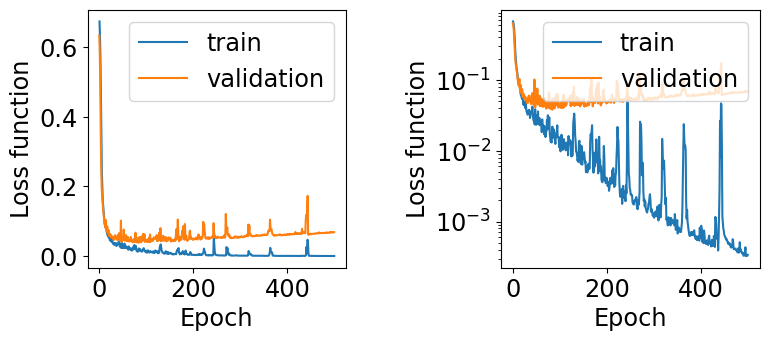

In [15]:
%%time 
def quadraticEqMLSolver(x_train, y_train, x_val, y_val):
    ##BEGIN_SOLUTION
    inputShape = (3)
    nNeurons = np.array([64, 64, 64])
    model = getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="sigmoid")
    
    initial_learning_rate = 1E-3
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=1000,
                    decay_rate=0.95,
                    staircase=True)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=['Accuracy','FalsePositives'])
    
    nEpochs = 500
    history = model.fit(x=x_train, y=y_train, 
                        epochs=nEpochs, 
                        batch_size = 32,
                        validation_data=(x_val, y_val),
                        verbose=0)
    plf.plotTrainHistory(history)
    model.evaluate(x_train, y_train)
    
    val_loss, val_acc, val_fpr = model.evaluate(x_val, y_val)
    val_fpr /= np.sum(1-y_val)
    
    print(colored("Validation accuracy:","blue"),val_acc)
    print(colored("Validation FPR","blue"),val_fpr)
    ##BEGIN_SOLUTION
    return model

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val);

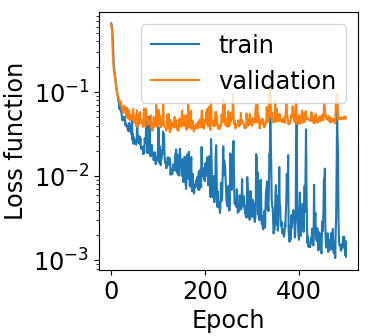

**overfitting:** the model fits the specific values from the training dataset, but `generalizes` poorly - the performance on unseen data is low.

**typical symptoms:** loss function decreases on the training dataset, but stops (or starts increasing) on the validation dataset.

**medication:**

* increasing the training dataset
* model regularization

**Please:**


* increase the training dataset to 10 000 examples and re-run the training

Training data shapes:  (10000, 3) (10000, 1)
Validation data shapes:  (10000, 3) (10000, 1)
313/313 [==============================] - 0s 1ms/step - loss: 0.0071 - Accuracy: 0.9974 - false_positives: 17.0000
Validation accuracy: 0.9973999857902527
Validation FPR 0.004604550379198266
CPU times: total: 7min 24s
Wall time: 5min 52s


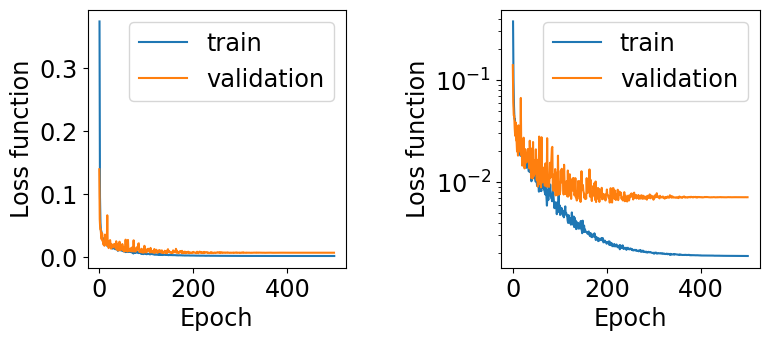

In [16]:
%%time
#BEGIN_SOLUTION
nSamples = 10000
x_train = qef.quadraticEqGenertor(nSamples)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)

print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val)
#END_SOLUTION
pass

## Weight regularization 

Standard operation to counteract overfitting is weight regularization. Two most popular variants are:

* **L1 regularization:**
$$
\huge{
\sum |w_{i}| < C
}
$$

* **L2 regularization:**
$$
\huge{
\sum w_{i}^{2} < C
}
$$

`L1` regularization may zero some of the weights, which won't happen with `L2`. 

Formally the regularization is obtained by addin a Lagrange multiplier to the loss function.
In the case of L2 regularization the loss function is:
$$
\huge{
L_{\text regularised} = L_{\text raw} +  \lambda \cdot \sum w_{i}^{2}
}
$$

In practice the regularization can be different for each layer, thus it is defined in the layer constructor:
```Python
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None
)
```

**Please:**

* go back to the training and validation datasets with 1000 elements
* use L2 regularization in the hidden layers
* experiment with the value of $\lambda$

**Hints:** 
* you can modify the model generating function
* the model can get stuck in the untrained state - the neurons get stuck in `0` state with a zero gradient

In [ ]:
%%time
#BEGIN_SOLUTION
nSamples = 1000
x_train = qef.quadraticEqGenertor(nSamples)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)

def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):
   
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer='glorot_uniform',
                                  kernel_regularizer=tf.keras.regularizers.L2(l2=0.01),
                                  name="layer_"+str(iLayer))(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val)
#END_SOLUTION
pass

## Regularization through dropout

Another method of regularizing the weights is to perturb the network during training. The most popular method is to turn off (dropout) randomly selected neurons by setting their weights to 0.

The dropout algorithm is controlled by the `dropout_rate` parameter, which determines what fraction of neurons will be turned off during each iteration of the training loop. **In each iteration random neurons are dropped out**

Dropout is implemented as a dedicated layer, which removes the output of selected neurons in the previous layer:
```Python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

**Attention:** dropout is only active during training. If we use the `model.fit()` or `model.predict()` methods, it is automatically adjusted for us. Direct control can be achieved using the `training` parameter of the `()` operator:

```Python
model(x_test, training=True)
```

Unfortunately the `()` operator does not support data batches. To process data batches one has to set the `training` patameter explicitly for each layer. 

In [ ]:
%%time
##BEGIN_SOLUTION
def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):
   
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer='glorot_uniform',
                                  kernel_regularizer=tf.keras.regularizers.L2(l2=0.01),
                                  name="layer_"+str(iLayer))(x)
        x = tf.keras.layers.Dropout(name="dropout_layer_"+str(iLayer),rate=0.2)(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val)
#END_SOLUTION
pass

## Monte Carlo regularization

Dropout regularization results in random networks being created in each iteration - the list of active neurons is different for each network. This fact can be used to create an ensemble of networks during prediction by activating dropout layers during prediction. Averaging the results of many variants of the network we can reduce the error and estimate the spread of the results.

**Please:**

* train a model using L2 regularization and dropout. You can use the model trained in previous cell. 
* create a set (ensemble) of 100 model results with dropout layers active during inference
* define the most voted results as the output of your ensemble
* calculate accuracy and FPR for the validation dataset

**Hints:**
* please take a look at the `tf.keras.Model` documentation and see how to set the state as during training
* during code development you can set the number of models to `1` to speed-up the `code-test` loop

In [ ]:
%%time
##BEGIN_SOLUTION
nModels = 100

ensemble = np.stack([model(x_val, training=True) for iModel in range(0,nModels)]) 
mean = ensemble.mean(axis=0)>0.5
std = ensemble.std(axis=0)

val_acc = np.mean(mean==y_val)
val_fpr = np.sum(mean*(1-y_val))/np.sum(1-y_val)
val_fnr = np.sum((1-mean)*y_val)/np.sum(y_val)
    
print(colored("Validation accuracy:","blue"),val_acc)
print(colored("Validation FPR","blue"),val_fpr)
print(colored("Validation FNR","blue"),val_fnr)
#END_SOLUTION
pass

# Homework

**Please:** 

build a model that finds the solutions to the quadratic equation. You can assume that the input only contains solvable equations.

* please plot the histogram of the relative difference:

  $$
   \delta = \frac{model - true}{true}
  $$
* please calculate the metric value:
  $$
  x = \text{fraction of samples for which}~\delta<10^{-2}
  $$

You can try anything (except cheating) to achieve decent precision. Decent precision is $x>0.1$.

If the results are not spectacular, you should be able to argument that the model learns, that is the model output is somehow correlated with the expected values.

In [5]:
#Input data preparation
##BEGIN_SOLUTION
x = np.random.default_rng().uniform(-1,1,(150000,3))
y = qef.quadraticEqSolution(x) 

#Select equations with solution
mask = y[:,0]!=None
x = x[mask].astype(float)
y= y[mask].astype(float)

#Sort solutions for each equation
y = np.sort(y, axis=1)

x_val = x[:10000,:]
y_val = y[:10000,:]

x_train = x[10000:,:]
y_train = y[10000:,:]

print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)
#END_SOLUTION
pass

Training data shapes:  (84024, 3) (84024, 2)
Validation data shapes:  (10000, 3) (10000, 2)


/scratch_hdd/akalinow/Zajecia/2023-2024/Lato/Uczenie_maszynowe_2/UczenieMaszynoweII/EN/../modules/quadratic_equation.py:21: RuntimeWarning: invalid value encountered in sqrt
  result = np.where(delta>0, np.sqrt(delta), 0.0)


In [ ]:
%%time
#model definition and training
#BEGIN_SOLUTION
inputShape = (3,)

#nNeurons = np.full((16),128) #1500 epok 87% nStepsPerEpoch*15
nNeurons = np.full((16),256) #1500 epok 90% nStepsPerEpoch*20

nOutputNeurons = 2

def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):
   
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation,
                                  kernel_initializer='he_normal',
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  name="layer_"+str(iLayer))(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons, 
                 nNeurons=nNeurons, 
                 hiddenActivation="tanh", #it was found by one of students that tanh works much beeter than relu or sigmoid
                 outputActivation="linear")                 

#configure learning process
initial_learning_rate = 1E-4
batchSize = 128
nEpochs = 3000

nStepsPerEpoch = len(x_train)/batchSize
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*20,
                decay_rate=0.95,
                staircase=False)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)
              
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss = 'mape'
             )

#run training
history = model.fit(x=x_train, y=y_train, 
                    epochs=nEpochs, 
                    batch_size = batchSize,
                    validation_data=(x_val, y_val),
                    #callbacks=[callback], #early stopping terminates trainig too early, as loss function is bumpy
                    verbose=0)
plf.plotTrainHistory(history)

#performance on training dataset
print(colored("Training dataset.","blue"))
y_pred = model.predict(x_train)
qef.plotSqEqSolutions(x_train, y_train, y_pred)

#performance on validation dataset
print(colored("Validation dataset.","blue"))
y_pred = model.predict(x_val)
qef.plotSqEqSolutions(x_val, y_val, y_pred)
#END_SOLUTION
pass

In [3]:
%%time

#BEGIN_SOLUTION
#training with a dedicated loss function
model = getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons, 
                 nNeurons=nNeurons, 
                 hiddenActivation="relu", 
                 outputActivation="linear")

initial_learning_rate = 5E-4
nStepsPerEpoch = len(x_train)/batchSize
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*50,
                decay_rate=0.95,
                staircase=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss = qef.QuadraticEquationLoss())

nEpochs = 100
history = model.fit(x=x_train, y=x_train, 
                    epochs=nEpochs, 
                    batch_size = batchSize,
                    validation_data=(x_val, x_val),
                    verbose=0)
plf.plotTrainHistory(history)

#performance on training 
print(colored("Training dataset.","red"))
y_pred = model.predict(x_train)
qef.plotSqEqSolutions(x_train, y_train, y_pred)
#and validation datasets
print(colored("Validation dataset.","red"))
y_pred = model.predict(x_val)
qef.plotSqEqSolutions(x_val, y_val, y_pred)
#END_SOLUTION
pass

NameError: name 'getModel' is not defined